In [1]:
import numpy as np
import pandas as pd


In [2]:
pip install xgboost

Note: you may need to restart the kernel to use updated packages.


In [3]:
df = pd.read_csv("laptop_data.csv")

In [4]:
df.head()

,Unnamed: 0,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
0,0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,71378.6832
1,1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,47895.5232
2,2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,30636.0000
3,3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,135195.3360
4,4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,96095.8080


In [5]:
df.tail()

,Unnamed: 0,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
1298,1298,Lenovo,2 in 1 Convertible,14.0,IPS Panel Full HD / Touchscreen 1920x1080,Intel Core i7 6500U 2.5GHz,4GB,128GB SSD,Intel HD Graphics 520,Windows 10,1.8kg,33992.64
1299,1299,Lenovo,2 in 1 Convertible,13.3,IPS Panel Quad HD+ / Touchscreen 3200x1800,Intel Core i7 6500U 2.5GHz,16GB,512GB SSD,Intel HD Graphics 520,Windows 10,1.3kg,79866.72
1300,1300,Lenovo,Notebook,14.0,1366x768,Intel Celeron Dual Core N3050 1.6GHz,2GB,64GB Flash Storage,Intel HD Graphics,Windows 10,1.5kg,12201.12
1301,1301,HP,Notebook,15.6,1366x768,Intel Core i7 6500U 2.5GHz,6GB,1TB HDD,AMD Radeon R5 M330,Windows 10,2.19kg,40705.92
1302,1302,Asus,Notebook,15.6,1366x768,Intel Celeron Dual Core N3050 1.6GHz,4GB,500GB HDD,Intel HD Graphics,Windows 10,2.2kg,19660.32


In [6]:
df.shape

(1303, 12)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        1303 non-null   int64  
 1   Company           1303 non-null   object 
 2   TypeName          1303 non-null   object 
 3   Inches            1303 non-null   float64
 4   ScreenResolution  1303 non-null   object 
 5   Cpu               1303 non-null   object 
 6   Ram               1303 non-null   object 
 7   Memory            1303 non-null   object 
 8   Gpu               1303 non-null   object 
 9   OpSys             1303 non-null   object 
 10  Weight            1303 non-null   object 
 11  Price             1303 non-null   float64
dtypes: float64(2), int64(1), object(9)
memory usage: 122.3+ KB


In [8]:
#to check duplicate rows
df.duplicated().sum()

0

In [9]:
df.isnull().sum()  # to check missing value

Unnamed: 0          0
Company             0
TypeName            0
Inches              0
ScreenResolution    0
Cpu                 0
Ram                 0
Memory              0
Gpu                 0
OpSys               0
Weight              0
Price               0
dtype: int64

# No missing value so no need of preprocessing

In [10]:
df.drop(columns = ['Unnamed: 0'],inplace=True)

In [11]:
df.head()

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,71378.6832
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,47895.5232
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,30636.0000
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,135195.3360
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,96095.8080


In [12]:
df["Ram"]= df["Ram"].str.replace("GB",'')
df["Weight"]= df["Weight"].str.replace("kg",'')

In [13]:
df.head()

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080


In [14]:
df["Ram"]=df["Ram"].astype("int32")
df["Weight"]=df["Weight"].astype("float32")

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Company           1303 non-null   object 
 1   TypeName          1303 non-null   object 
 2   Inches            1303 non-null   float64
 3   ScreenResolution  1303 non-null   object 
 4   Cpu               1303 non-null   object 
 5   Ram               1303 non-null   int32  
 6   Memory            1303 non-null   object 
 7   Gpu               1303 non-null   object 
 8   OpSys             1303 non-null   object 
 9   Weight            1303 non-null   float32
 10  Price             1303 non-null   float64
dtypes: float32(1), float64(2), int32(1), object(7)
memory usage: 101.9+ KB


In [16]:
import seaborn as sns
import matplotlib as plt

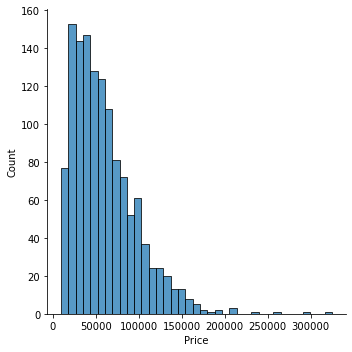

In [17]:
sns.displot(df["Price"])

<AxesSubplot:>

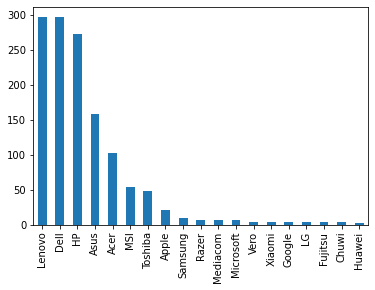

In [18]:
df["Company"].value_counts().plot(kind="bar")

<AxesSubplot:xlabel='Company', ylabel='Price'>

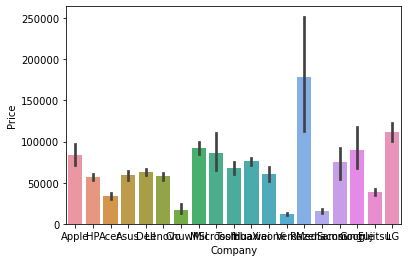

In [19]:
sns.barplot(x=df["Company"],y=df["Price"])


<AxesSubplot:>

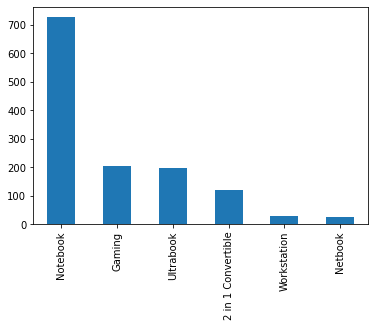

In [20]:
df['TypeName'].value_counts().plot(kind= 'bar')

<AxesSubplot:xlabel='TypeName', ylabel='Price'>

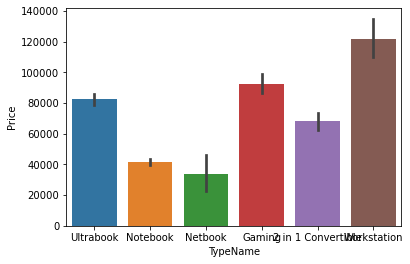

In [21]:
sns.barplot(x=df["TypeName"],y=df["Price"])


C:\Users\farhan\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Inches', ylabel='Density'>

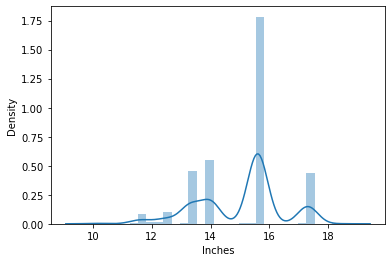

In [22]:
sns.distplot(df['Inches'])

<AxesSubplot:xlabel='Inches', ylabel='Price'>

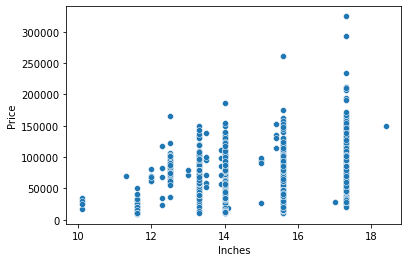

In [23]:
sns.scatterplot(x=df['Inches'],y=df['Price'])

In [24]:
#Now feature engineering the most difficult column i.e Screen resolution to make it work properly
df['ScreenResolution'].value_counts()

Full HD 1920x1080                                507
1366x768                                         281
IPS Panel Full HD 1920x1080                      230
IPS Panel Full HD / Touchscreen 1920x1080         53
Full HD / Touchscreen 1920x1080                   47
1600x900                                          23
Touchscreen 1366x768                              16
Quad HD+ / Touchscreen 3200x1800                  15
IPS Panel 4K Ultra HD 3840x2160                   12
IPS Panel 4K Ultra HD / Touchscreen 3840x2160     11
4K Ultra HD / Touchscreen 3840x2160               10
4K Ultra HD 3840x2160                              7
IPS Panel 1366x768                                 7
Touchscreen 2560x1440                              7
IPS Panel Quad HD+ / Touchscreen 3200x1800         6
IPS Panel Retina Display 2560x1600                 6
IPS Panel Retina Display 2304x1440                 6
Touchscreen 2256x1504                              6
IPS Panel Touchscreen 2560x1440               

In [25]:
#here some laptop has touchscreen while some not so feature engineering and making a new column of touchscreen
df['Touchscreen'] = df['ScreenResolution'].apply(lambda x:1 if 'Touchscreen' in x else 0)

In [26]:
df.head()

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,0
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0


<AxesSubplot:>

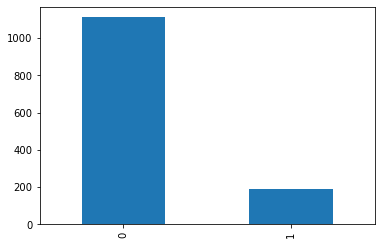

In [27]:
df['Touchscreen'].value_counts().plot(kind='bar')

<AxesSubplot:xlabel='Touchscreen', ylabel='Price'>

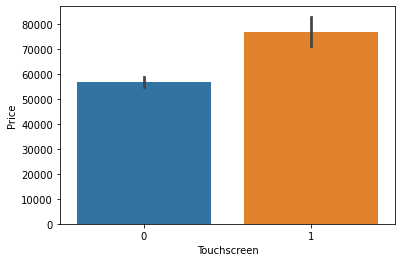

In [28]:
sns.barplot(x=df['Touchscreen'],y = df['Price'])

# To check whether feature other than touchscreen is important or not 

In [29]:
df['Ips'] = df['ScreenResolution'].apply(lambda x:1 if 'IPS' in x else 0)

In [30]:
df.head()

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,Ips
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1


<AxesSubplot:>

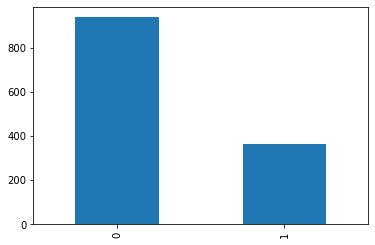

In [31]:
df['Ips'].value_counts().plot(kind='bar')

<AxesSubplot:xlabel='Ips', ylabel='Price'>

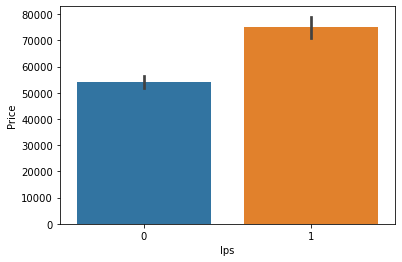

In [32]:
sns.barplot(x=df['Ips'],y = df['Price'])

In [33]:
# to extract the exact resolution in numbers We separate 1920 as x resolution and 1080 as y resolution eg 1920x1080p
new = df['ScreenResolution'].str.split('x',n=1,expand=True)

In [34]:
df['X_res']= new[0]
df['Y_res']= new[1]

In [35]:
df.head()

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,Ips,X_res,Y_res
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,IPS Panel Retina Display 2560,1600
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,1440,900
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,Full HD 1920,1080
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1,IPS Panel Retina Display 2880,1800
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1,IPS Panel Retina Display 2560,1600


In [36]:
#Now here Y_res is done what we wanted but still there is issue in X_res So
df['X_res']= df['X_res'].str.replace(',','').str.findall(r'(\d+\.?\d+)').apply(lambda x:x[0])   # here by doing this we are finding out just the pattern which has digits

In [37]:
df.head()

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,Ips,X_res,Y_res
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,2560,1600
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,1440,900
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,1920,1080
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1,2880,1800
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1,2560,1600


# hence the X_res is also fixed 

In [38]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Company           1303 non-null   object 
 1   TypeName          1303 non-null   object 
 2   Inches            1303 non-null   float64
 3   ScreenResolution  1303 non-null   object 
 4   Cpu               1303 non-null   object 
 5   Ram               1303 non-null   int32  
 6   Memory            1303 non-null   object 
 7   Gpu               1303 non-null   object 
 8   OpSys             1303 non-null   object 
 9   Weight            1303 non-null   float32
 10  Price             1303 non-null   float64
 11  Touchscreen       1303 non-null   int64  
 12  Ips               1303 non-null   int64  
 13  X_res             1303 non-null   object 
 14  Y_res             1303 non-null   object 
dtypes: float32(1), float64(2), int32(1), int64(2), object(9)
memory usage: 142.6+ KB


In [39]:
#datatype of x_res and Y_res is object so to converting it into int
df['X_res']= df['X_res'].astype('int')
df['Y_res']= df['Y_res'].astype('int')

In [40]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Company           1303 non-null   object 
 1   TypeName          1303 non-null   object 
 2   Inches            1303 non-null   float64
 3   ScreenResolution  1303 non-null   object 
 4   Cpu               1303 non-null   object 
 5   Ram               1303 non-null   int32  
 6   Memory            1303 non-null   object 
 7   Gpu               1303 non-null   object 
 8   OpSys             1303 non-null   object 
 9   Weight            1303 non-null   float32
 10  Price             1303 non-null   float64
 11  Touchscreen       1303 non-null   int64  
 12  Ips               1303 non-null   int64  
 13  X_res             1303 non-null   int32  
 14  Y_res             1303 non-null   int32  
dtypes: float32(1), float64(2), int32(3), int64(2), object(7)
memory usage: 132.5+ KB


# Done

In [41]:
# to check correlation of features with price to analyze whether it is important or not to include
df.corr()['Price']

Inches         0.068197
Ram            0.743007
Weight         0.210370
Price          1.000000
Touchscreen    0.191226
Ips            0.252208
X_res          0.556529
Y_res          0.552809
Name: Price, dtype: float64

In [42]:
df['ppi']=(((df['X_res']**2)+(df['Y_res']**2))**0.5/df['Inches']).astype('float')

In [43]:
df.corr()['Price']

Inches         0.068197
Ram            0.743007
Weight         0.210370
Price          1.000000
Touchscreen    0.191226
Ips            0.252208
X_res          0.556529
Y_res          0.552809
ppi            0.473487
Name: Price, dtype: float64

# so here as compared to Inches PPi(pixel per Inches) has more correlation with price 

In [44]:
#Now from screenResolution column we have takeout all necessary info so now no need of that column
df.drop(columns=['ScreenResolution'],inplace=True)
df.drop(columns=['Inches'],inplace=True)
df.drop(columns=['X_res'],inplace=True)
df.drop(columns=['Y_res'],inplace=True)

In [45]:
df.head()

,Company,TypeName,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,Ips,ppi
0,Apple,Ultrabook,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,226.983005
1,Apple,Ultrabook,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,127.677940
2,HP,Notebook,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,141.211998
3,Apple,Ultrabook,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1,220.534624
4,Apple,Ultrabook,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1,226.983005


In [46]:
#To clean Cpu column
df['Cpu'].value_counts()

Intel Core i5 7200U 2.5GHz     190
Intel Core i7 7700HQ 2.8GHz    146
Intel Core i7 7500U 2.7GHz     134
Intel Core i7 8550U 1.8GHz      73
Intel Core i5 8250U 1.6GHz      72
                              ... 
AMD A4-Series 7210 2.2GHz        1
AMD FX 8800P 2.1GHz              1
Intel Core i7 2.8GHz             1
Intel Core M M7-6Y75 1.2GHz      1
Intel Core i5 7200U 2.7GHz       1
Name: Cpu, Length: 118, dtype: int64

In [47]:
#To extract first three words Which is essential
df['CPU Name']= df['Cpu'].apply(lambda x:" ".join(x.split()[0:3]))

In [48]:
df.head()

,Company,TypeName,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,Ips,ppi,CPU Name
0,Apple,Ultrabook,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,226.983005,Intel Core i5
1,Apple,Ultrabook,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,127.677940,Intel Core i5
2,HP,Notebook,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,141.211998,Intel Core i5
3,Apple,Ultrabook,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1,220.534624,Intel Core i7
4,Apple,Ultrabook,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1,226.983005,Intel Core i5


In [49]:
def fetch_processor(text):
    if text == 'Intel Core i7' or text == 'Intel Core i5' or text == 'Intel Core i3':
        return text
    else:
        if text.split()[0] == 'Intel':
            return 'other Intel Processor'
        else:
            return 'AMD Processor'

In [50]:
df['Cpu Brand'] = df['CPU Name'].apply(fetch_processor)

In [51]:
df.head()

,Company,TypeName,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,Ips,ppi,CPU Name,Cpu Brand
0,Apple,Ultrabook,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,226.983005,Intel Core i5,Intel Core i5
1,Apple,Ultrabook,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,127.677940,Intel Core i5,Intel Core i5
2,HP,Notebook,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,141.211998,Intel Core i5,Intel Core i5
3,Apple,Ultrabook,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1,220.534624,Intel Core i7,Intel Core i7
4,Apple,Ultrabook,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1,226.983005,Intel Core i5,Intel Core i5


<AxesSubplot:>

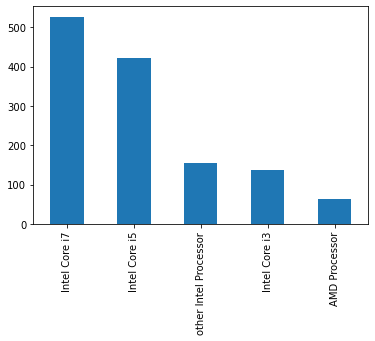

In [52]:
df['Cpu Brand'].value_counts().plot(kind='bar')

<AxesSubplot:xlabel='Cpu Brand', ylabel='Price'>

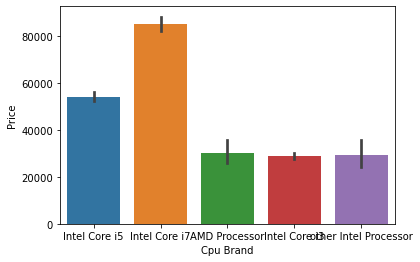

In [53]:
sns.barplot(x=df['Cpu Brand'],y = df['Price'])

In [54]:
df.drop(columns=['Cpu','CPU Name'],inplace= True)

In [55]:
df.head()

,Company,TypeName,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,Ips,ppi,Cpu Brand
0,Apple,Ultrabook,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,226.983005,Intel Core i5
1,Apple,Ultrabook,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,127.677940,Intel Core i5
2,HP,Notebook,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,141.211998,Intel Core i5
3,Apple,Ultrabook,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1,220.534624,Intel Core i7
4,Apple,Ultrabook,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1,226.983005,Intel Core i5


<AxesSubplot:>

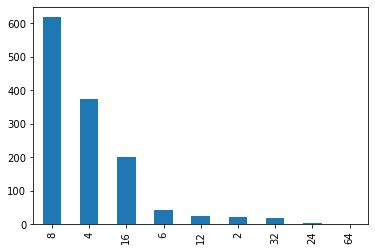

In [56]:
#Now cleaning Ram , Memory and gpu
df['Ram'].value_counts().plot(kind='bar')

<AxesSubplot:xlabel='Ram', ylabel='Price'>

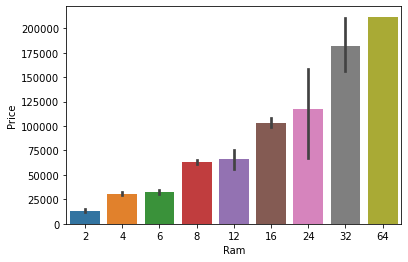

In [57]:
sns.barplot(x=df['Ram'],y = df['Price'])

In [58]:
#for memory the second complex column
df['Memory'].value_counts()

256GB SSD                        412
1TB HDD                          223
500GB HDD                        132
512GB SSD                        118
128GB SSD +  1TB HDD              94
128GB SSD                         76
256GB SSD +  1TB HDD              73
32GB Flash Storage                38
2TB HDD                           16
64GB Flash Storage                15
1TB SSD                           14
512GB SSD +  1TB HDD              14
256GB SSD +  2TB HDD              10
1.0TB Hybrid                       9
256GB Flash Storage                8
16GB Flash Storage                 7
32GB SSD                           6
180GB SSD                          5
128GB Flash Storage                4
512GB SSD +  2TB HDD               3
16GB SSD                           3
512GB Flash Storage                2
1TB SSD +  1TB HDD                 2
256GB SSD +  500GB HDD             2
128GB SSD +  2TB HDD               2
256GB SSD +  256GB SSD             2
128GB HDD                          1
5

In [59]:
df['Memory'] = df[ 'Memory'].astype(str).replace('\.0','',regex=True)

df["Memory"] = df["Memory"].str.replace('GB','')

df["Memory"] = df["Memory"].str.replace('TB', '000') 

new = df["Memory"].str.split("+", n = 1, expand = True)

df["first"]= new[0]

df["first"]=df["first"].str.strip()

df["second"]= new[1]

df["Layer1HDD"] = df["first"].apply(lambda x: 1 if "HDD" in x else 0)

df["Layer1SSD"]=df["first"].apply(lambda x: 1 if "SSD" in x else 0) 

df["Layer1Hybrid"] = df["first"].apply(lambda x: 1 if "Hybrid" in x else 0)

df["Layer1Flash_Storage"] = df["first"].apply(lambda x: 1 if "Flash Storage" in x else 0)

df['first']=df['first'].str.replace(r'\D','')
               
df["second"].fillna("0", inplace=True)

df["Layer2HDD"]=df["second"].apply(lambda x: 1 if "HDD" in x else 0) 
               
df["Layer2SSD"] = df["second"].apply(lambda x: 1 if "SSD" in x else 0)

df["Layer2Hybrid"] = df["second"].apply(lambda x: 1 if "Hybrid" in x else 0) 
               
df["Layer2Flash_Storage"] = df["second"].apply(lambda x: 1 if "Flash Storage" in x else 0)

df['second'] = df['second'].str.replace(r'\D','')

df["first"] = df["first"].astype(int)

df["second"]=df["second"].astype(int)

df["HDD"]=(df["first"]*df["Layer1HDD"]+df["second"]*df["Layer2HDD"]) 
df["SSD"]=(df["first"]*df["Layer1SSD"]+df["second"]*df["Layer2SSD"]) 
df["Hybrid"]=(df["first"]*df["Layer1Hybrid"]+df["second"]*df["Layer2Hybrid"]) 
df["Flash Storage"]=(df["first"]*df["Layer1Flash_Storage"]+df["second"]*df["Layer2Flash_Storage"])

df.drop(columns=['first', 'second', 'Layer1HDD', 'Layer1SSD', "Layer1Hybrid",'Layer1Flash_Storage', 'Layer2HDD', 'Layer2SSD', 'Layer2Hybrid',
'Layer2Flash_Storage'], inplace=True)

<ipython-input-59-a3a5741baefe>:23: FutureWarning: The default value of regex will change from True to False in a future version.
  df['first']=df['first'].str.replace(r'\D','')
<ipython-input-59-a3a5741baefe>:35: FutureWarning: The default value of regex will change from True to False in a future version.
  df['second'] = df['second'].str.replace(r'\D','')


In [60]:
df.head()

,Company,TypeName,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,Ips,ppi,Cpu Brand,HDD,SSD,Hybrid,Flash Storage
0,Apple,Ultrabook,8,128 SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,226.983005,Intel Core i5,0,128,0,0
1,Apple,Ultrabook,8,128 Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,127.677940,Intel Core i5,0,0,0,128
2,HP,Notebook,8,256 SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,141.211998,Intel Core i5,0,256,0,0
3,Apple,Ultrabook,16,512 SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1,220.534624,Intel Core i7,0,512,0,0
4,Apple,Ultrabook,8,256 SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1,226.983005,Intel Core i5,0,256,0,0


In [61]:
df.drop(columns=['Memory'],inplace=True)

In [62]:
df.head()

,Company,TypeName,Ram,Gpu,OpSys,Weight,Price,Touchscreen,Ips,ppi,Cpu Brand,HDD,SSD,Hybrid,Flash Storage
0,Apple,Ultrabook,8,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,226.983005,Intel Core i5,0,128,0,0
1,Apple,Ultrabook,8,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,127.677940,Intel Core i5,0,0,0,128
2,HP,Notebook,8,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,141.211998,Intel Core i5,0,256,0,0
3,Apple,Ultrabook,16,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1,220.534624,Intel Core i7,0,512,0,0
4,Apple,Ultrabook,8,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1,226.983005,Intel Core i5,0,256,0,0


In [63]:
df.corr()['Price']

Ram              0.743007
Weight           0.210370
Price            1.000000
Touchscreen      0.191226
Ips              0.252208
ppi              0.473487
HDD             -0.096441
SSD              0.670799
Hybrid           0.007989
Flash Storage   -0.040511
Name: Price, dtype: float64

In [64]:
#So from here SSD and HDD is what matters dropping the Hybrid and flash
df.drop(columns=['Hybrid','Flash Storage'],inplace=True)

In [65]:
df.sample(10)

,Company,TypeName,Ram,Gpu,OpSys,Weight,Price,Touchscreen,Ips,ppi,Cpu Brand,HDD,SSD
1138,MSI,Gaming,16,Nvidia GeForce GTX 980M,Windows 10,3.78,127818.7200,0,0,127.335675,Intel Core i7,1000,256
355,Dell,Notebook,8,AMD Radeon 530,Windows 10,2.02,51729.5520,0,0,141.211998,Intel Core i7,2000,128
187,Lenovo,Gaming,8,Nvidia GeForce GTX 1050,No OS,2.40,41505.1200,0,1,141.211998,Intel Core i5,0,256
272,Dell,Notebook,8,AMD Radeon 520,Linux,2.14,39164.5296,0,0,141.211998,Intel Core i7,0,256
51,Acer,Notebook,8,Nvidia GeForce MX150,Windows 10,2.20,44808.4800,0,1,141.211998,Intel Core i7,0,256
1228,Lenovo,Gaming,16,Nvidia GeForce GTX 960M,Windows 10,2.60,54825.1200,1,1,141.211998,Intel Core i7,1000,128
514,Xiaomi,Notebook,16,Nvidia GeForce MX150,No OS,1.95,74589.3360,0,1,141.211998,Intel Core i7,0,256
249,Apple,Ultrabook,8,Intel Iris Plus Graphics 650,macOS,1.37,108691.2000,0,1,226.983005,Intel Core i5,0,512
820,Lenovo,Notebook,4,Intel HD Graphics 520,Windows 10,2.10,26101.8720,0,0,100.454670,Intel Core i3,500,0
1132,Asus,Notebook,4,Intel HD Graphics 500,Windows 10,1.50,14811.8400,0,0,111.935204,other Intel Processor,0,0


In [66]:
#nect remaining two columns Gpu and Op Sys
df['Gpu'].value_counts()

Intel HD Graphics 620      281
Intel HD Graphics 520      185
Intel UHD Graphics 620      68
Nvidia GeForce GTX 1050     66
Nvidia GeForce GTX 1060     48
                          ... 
AMD Radeon R7 M465           1
Nvidia GTX 980 SLI           1
Nvidia GeForce GTX 980       1
Nvidia GeForce GTX 940M      1
Intel Graphics 620           1
Name: Gpu, Length: 110, dtype: int64

In [67]:
df['Gpu Brand'] = df['Gpu'].apply(lambda x:x.split()[0])

In [68]:
df.head()

,Company,TypeName,Ram,Gpu,OpSys,Weight,Price,Touchscreen,Ips,ppi,Cpu Brand,HDD,SSD,Gpu Brand
0,Apple,Ultrabook,8,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,226.983005,Intel Core i5,0,128,Intel
1,Apple,Ultrabook,8,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,127.677940,Intel Core i5,0,0,Intel
2,HP,Notebook,8,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,141.211998,Intel Core i5,0,256,Intel
3,Apple,Ultrabook,16,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1,220.534624,Intel Core i7,0,512,AMD
4,Apple,Ultrabook,8,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1,226.983005,Intel Core i5,0,256,Intel


In [69]:
df['Gpu Brand'].value_counts()

Intel     722
Nvidia    400
AMD       180
ARM         1
Name: Gpu Brand, dtype: int64

In [70]:
df = df[df['Gpu Brand'] != 'ARM'] #  just one value so not imp removing it

In [71]:
df['Gpu Brand'].value_counts()

Intel     722
Nvidia    400
AMD       180
Name: Gpu Brand, dtype: int64

<AxesSubplot:xlabel='Gpu Brand', ylabel='Price'>

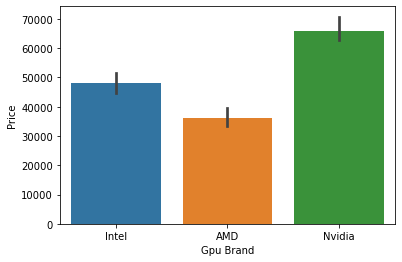

In [72]:
sns.barplot(x=df['Gpu Brand'],y = df['Price'],estimator= np.median) # to check whether shown value is correct because AMD price should be higher than Intel

In [73]:
df.drop(columns = ['Gpu'],inplace= True)

In [74]:
df.head()

,Company,TypeName,Ram,OpSys,Weight,Price,Touchscreen,Ips,ppi,Cpu Brand,HDD,SSD,Gpu Brand
0,Apple,Ultrabook,8,macOS,1.37,71378.6832,0,1,226.983005,Intel Core i5,0,128,Intel
1,Apple,Ultrabook,8,macOS,1.34,47895.5232,0,0,127.677940,Intel Core i5,0,0,Intel
2,HP,Notebook,8,No OS,1.86,30636.0000,0,0,141.211998,Intel Core i5,0,256,Intel
3,Apple,Ultrabook,16,macOS,1.83,135195.3360,0,1,220.534624,Intel Core i7,0,512,AMD
4,Apple,Ultrabook,8,macOS,1.37,96095.8080,0,1,226.983005,Intel Core i5,0,256,Intel


In [75]:
df['OpSys'].value_counts()

Windows 10      1072
No OS             66
Linux             62
Windows 7         45
Chrome OS         26
macOS             13
Mac OS X           8
Windows 10 S       8
Android            2
Name: OpSys, dtype: int64

In [76]:
def Cat_os(inp):
    if inp == 'Windows 10' or inp == 'Windows 7' or inp == 'Windows 10 S':
        return 'Windows'
    elif inp == 'macOS' or inp == 'Mac OS X':
        return "Mac"
    else:
        return 'Others/no OS /linux'

In [77]:
df['os']= df['OpSys'].apply(Cat_os)

In [78]:
df.head()

,Company,TypeName,Ram,OpSys,Weight,Price,Touchscreen,Ips,ppi,Cpu Brand,HDD,SSD,Gpu Brand,os
0,Apple,Ultrabook,8,macOS,1.37,71378.6832,0,1,226.983005,Intel Core i5,0,128,Intel,Mac
1,Apple,Ultrabook,8,macOS,1.34,47895.5232,0,0,127.677940,Intel Core i5,0,0,Intel,Mac
2,HP,Notebook,8,No OS,1.86,30636.0000,0,0,141.211998,Intel Core i5,0,256,Intel,Others/no OS /linux
3,Apple,Ultrabook,16,macOS,1.83,135195.3360,0,1,220.534624,Intel Core i7,0,512,AMD,Mac
4,Apple,Ultrabook,8,macOS,1.37,96095.8080,0,1,226.983005,Intel Core i5,0,256,Intel,Mac


In [79]:
df.drop(columns = ['OpSys'],inplace = True)

In [80]:
df.head()

,Company,TypeName,Ram,Weight,Price,Touchscreen,Ips,ppi,Cpu Brand,HDD,SSD,Gpu Brand,os
0,Apple,Ultrabook,8,1.37,71378.6832,0,1,226.983005,Intel Core i5,0,128,Intel,Mac
1,Apple,Ultrabook,8,1.34,47895.5232,0,0,127.677940,Intel Core i5,0,0,Intel,Mac
2,HP,Notebook,8,1.86,30636.0000,0,0,141.211998,Intel Core i5,0,256,Intel,Others/no OS /linux
3,Apple,Ultrabook,16,1.83,135195.3360,0,1,220.534624,Intel Core i7,0,512,AMD,Mac
4,Apple,Ultrabook,8,1.37,96095.8080,0,1,226.983005,Intel Core i5,0,256,Intel,Mac


<AxesSubplot:xlabel='os', ylabel='Price'>

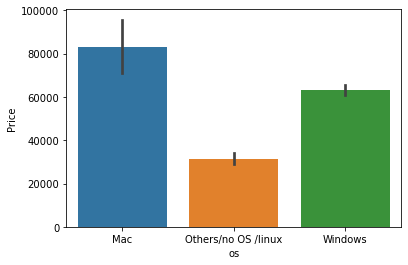

In [81]:
sns.barplot(x=df['os'],y = df['Price'])

C:\Users\farhan\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Weight', ylabel='Density'>

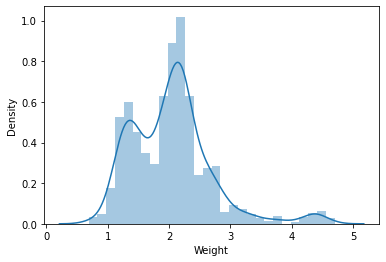

In [82]:
sns.distplot(df['Weight'])

# Done with all columns

<AxesSubplot:>

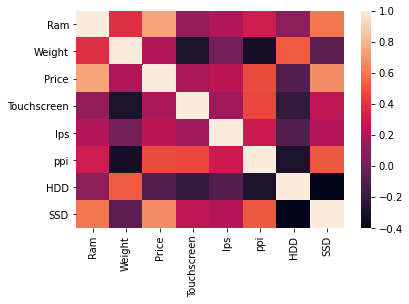

In [83]:
#Now analyzing whole matrix
sns.heatmap(df.corr())

C:\Users\farhan\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Price', ylabel='Density'>

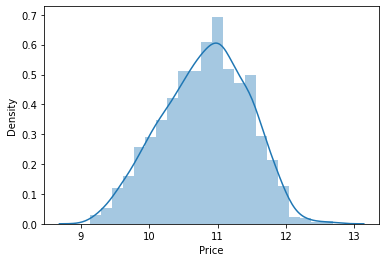

In [84]:
sns.distplot(np.log(df['Price']))

In [85]:
X = df.drop(columns=['Price'])
y = np.log(df['Price'])

In [86]:
X

,Company,TypeName,Ram,Weight,Touchscreen,Ips,ppi,Cpu Brand,HDD,SSD,Gpu Brand,os
0,Apple,Ultrabook,8,1.37,0,1,226.983005,Intel Core i5,0,128,Intel,Mac
1,Apple,Ultrabook,8,1.34,0,0,127.677940,Intel Core i5,0,0,Intel,Mac
2,HP,Notebook,8,1.86,0,0,141.211998,Intel Core i5,0,256,Intel,Others/no OS /linux
3,Apple,Ultrabook,16,1.83,0,1,220.534624,Intel Core i7,0,512,AMD,Mac
4,Apple,Ultrabook,8,1.37,0,1,226.983005,Intel Core i5,0,256,Intel,Mac
...,...,...,...,...,...,...,...,...,...,...,...,...
1298,Lenovo,2 in 1 Convertible,4,1.80,1,1,157.350512,Intel Core i7,0,128,Intel,Windows
1299,Lenovo,2 in 1 Convertible,16,1.30,1,1,276.053530,Intel Core i7,0,512,Intel,Windows
1300,Lenovo,Notebook,2,1.50,0,0,111.935204,other Intel Processor,0,0,Intel,Windows
1301,HP,Notebook,6,2.19,0,0,100.454670,Intel Core i7,1000,0,AMD,Windows


In [87]:
y

0       11.175755
1       10.776777
2       10.329931
3       11.814476
4       11.473101
          ...    
1298    10.433899
1299    11.288115
1300     9.409283
1301    10.614129
1302     9.886358
Name: Price, Length: 1302, dtype: float64

In [88]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.15,random_state=2)

In [89]:
#All categorical columns like company ,typename should be handled by using one hot encoding ,column transformer 
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import r2_score,mean_absolute_error

In [90]:
from sklearn.linear_model import LinearRegression,Ridge,Lasso
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor,AdaBoostRegressor,ExtraTreesRegressor
from sklearn.svm import SVR
from xgboost import XGBRegressor

# LINEAR REGRESSION

In [91]:
step1 = ColumnTransformer(transformers=[
    ('col_tnf',OneHotEncoder(sparse=False,drop='first'),[0,1,7,10,11])
],remainder ='passthrough')

step2 = LinearRegression()

pipe = Pipeline([
    ('step1',step1),
    ('step2',step2)
])

pipe.fit(X_train,y_train)

y_pred = pipe.predict(X_test)

print('R2_score',r2_score(y_test,y_pred))
print('MAE',mean_absolute_error(y_test,y_pred))

R2_score 0.80732774484187
MAE 0.21017827976428766


In [92]:
df.head(1)#To check column index to apply column transformer

,Company,TypeName,Ram,Weight,Price,Touchscreen,Ips,ppi,Cpu Brand,HDD,SSD,Gpu Brand,os
0,Apple,Ultrabook,8,1.37,71378.6832,0,1,226.983005,Intel Core i5,0,128,Intel,Mac


# RIDGE REGRESSION

In [93]:
step1 = ColumnTransformer(transformers=[
    ('col_tnf',OneHotEncoder(sparse=False,drop='first'),[0,1,7,10,11])
],remainder ='passthrough')

step2 = Ridge(alpha=10)

pipe = Pipeline([
    ('step1',step1),
    ('step2',step2)
])

pipe.fit(X_train,y_train)

y_pred = pipe.predict(X_test)

print('R2_score',r2_score(y_test,y_pred))
print('MAE',mean_absolute_error(y_test,y_pred))

R2_score 0.812733103131181
MAE 0.20926802242582962


# LassO REgression

In [94]:
step1 = ColumnTransformer(transformers=[
    ('col_tnf',OneHotEncoder(sparse=False,drop='first'),[0,1,7,10,11])
],remainder ='passthrough')

step2 = Lasso(alpha=0.001)

pipe = Pipeline([
    ('step1',step1),
    ('step2',step2)
])

pipe.fit(X_train,y_train)

y_pred = pipe.predict(X_test)

print('R2_score',r2_score(y_test,y_pred))
print('MAE',mean_absolute_error(y_test,y_pred))

R2_score 0.8071853945317105
MAE 0.21114361613472565


# KNN 

In [95]:
step1 = ColumnTransformer(transformers=[
    ('col_tnf',OneHotEncoder(sparse=False,drop='first'),[0,1,7,10,11])
],remainder ='passthrough')

step2 = KNeighborsRegressor(n_neighbors=3)

pipe = Pipeline([
    ('step1',step1),
    ('step2',step2)
])

pipe.fit(X_train,y_train)

y_pred = pipe.predict(X_test)

print('R2_score',r2_score(y_test,y_pred))
print('MAE',mean_absolute_error(y_test,y_pred))

R2_score 0.8021984604448553
MAE 0.19319716721521116


# DECISION TREE

In [96]:
step1 = ColumnTransformer(transformers=[
    ('col_tnf',OneHotEncoder(sparse=False,drop='first'),[0,1,7,10,11])
],remainder ='passthrough')

step2 = DecisionTreeRegressor(max_depth=8)

pipe = Pipeline([
    ('step1',step1),
    ('step2',step2)
])

pipe.fit(X_train,y_train)

y_pred = pipe.predict(X_test)

print('R2_score',r2_score(y_test,y_pred))
print('MAE',mean_absolute_error(y_test,y_pred))

R2_score 0.8368386002900097
MAE 0.18471434167536485


# SVM

In [97]:
step1 = ColumnTransformer(transformers=[
    ('col_tnf',OneHotEncoder(sparse=False,drop='first'),[0,1,7,10,11])
],remainder ='passthrough')

step2 = SVR(kernel='rbf',C=10000,epsilon=0.1)

pipe = Pipeline([
    ('step1',step1),
    ('step2',step2)
])

pipe.fit(X_train,y_train)

y_pred = pipe.predict(X_test)

print('R2_score',r2_score(y_test,y_pred))
print('MAE',mean_absolute_error(y_test,y_pred))

R2_score 0.8083180902289917
MAE 0.2023905942719158


# RandomForest

In [98]:
step1 = ColumnTransformer(transformers=[
    ('col_tnf',OneHotEncoder(sparse=False,drop='first'),[0,1,7,10,11])
],remainder ='passthrough')

step2 = RandomForestRegressor(n_estimators=100,
                             random_state= 3,
                             max_samples=0.5,
                             max_features=0.75,
                             max_depth=15)

pipe = Pipeline([
    ('step1',step1),
    ('step2',step2)
])

pipe.fit(X_train,y_train)

y_pred = pipe.predict(X_test)

print('R2_score',r2_score(y_test,y_pred))
print('MAE',mean_absolute_error(y_test,y_pred))

R2_score 0.8873402378382488
MAE 0.15860130110457718


# ADABOOST

In [99]:
step1 = ColumnTransformer(transformers=[
    ('col_tnf',OneHotEncoder(sparse=False,drop='first'),[0,1,7,10,11])
],remainder ='passthrough')

step2 = AdaBoostRegressor(n_estimators=15,learning_rate= 1.0)

pipe = Pipeline([
    ('step1',step1),
    ('step2',step2)
])

pipe.fit(X_train,y_train)

y_pred = pipe.predict(X_test)

print('R2_score',r2_score(y_test,y_pred))
print('MAE',mean_absolute_error(y_test,y_pred))

R2_score 0.7863264069270142
MAE 0.2331772497297634


# GradientBOost

In [100]:
step1 = ColumnTransformer(transformers=[
    ('col_tnf',OneHotEncoder(sparse=False,drop='first'),[0,1,7,10,11])
],remainder ='passthrough')

step2 = GradientBoostingRegressor(n_estimators=500)

pipe = Pipeline([
    ('step1',step1),
    ('step2',step2)
])

pipe.fit(X_train,y_train)

y_pred = pipe.predict(X_test)

print('R2_score',r2_score(y_test,y_pred))
print('MAE',mean_absolute_error(y_test,y_pred))

R2_score 0.8830803631536752
MAE 0.1591848699978004


# EXtra Trees

In [101]:
step1 = ColumnTransformer(transformers=[
    ('col_tnf',OneHotEncoder(sparse=False,drop='first'),[0,1,7,10,11])
],remainder ='passthrough')

step2 = ExtraTreesregressor(n_estimators = 100,random_state=3,max_samples=0.5,max_features=0.75,max_depth=10)

pipe = Pipeline([
    ('step1',step1),
    ('step2',step2)
])

pipe.fit(X_train,y_train)

y_pred = pipe.predict(X_test)

print('R2_score',r2_score(y_test,y_pred))
print('MAE',mean_absolute_error(y_test,y_pred))

NameError: name 'ExtraTreesregressor' is not defined

# XGBOOST

In [ ]:
step1 = ColumnTransformer(transformers=[
    ('col_tnf',OneHotEncoder(sparse=False,drop='first'),[0,1,7,10,11])
],remainder ='passthrough')

step2 = XGBRegressor(n_estimators=45,max_depth=5,learning_rate=0.5)

pipe = Pipeline([
    ('step1',step1),
    ('step2',step2)
])

pipe.fit(X_train,y_train)

y_pred = pipe.predict(X_test)

print('R2_score',r2_score(y_test,y_pred))
print('MAE',mean_absolute_error(y_test,y_pred))

# Voting Regressor #Comining the mmodel to determine the best model

In [105]:
from sklearn.ensemble import VotingRegressor,StackingRegressor

step1 = ColumnTransformer(transformers=[
    ('col_tnf',OneHotEncoder(sparse=False,drop='first'),[0,1,7,10,11])
],remainder ='passthrough')


rf = RandomForestRegressor(n_estimators=100,
                             random_state= 3,
                             max_samples=0.5,
                             max_features=0.75,
                             max_depth=15)
gbdt = GradientBoostingRegressor(n_estimators=500)
xgb = XGBRegressor(n_estimators=45,max_depth=5,learning_rate=0.5)
lr = LinearRegression()
et = ExtraTreesRegressor(n_estimators = 100,random_state=3,max_samples=0.5,max_features=0.75,max_depth=10)

step2 = VotingRegressor([('rf',rf), ('gbdt',gbdt), ('xgb',xgb),('et',et)],weights=[5,1,1,1])

pipe = Pipeline([
    ('step1',step1),
    ('step2',step2)
])

pipe.fit(X_train,y_train)

y_pred = pipe.predict(X_test)

print('R2_score',r2_score(y_test,y_pred))
print('MAE',mean_absolute_error(y_test,y_pred))

R2_score 0.8933232026296003
MAE 0.15431599627203665


In [106]:
step1 = ColumnTransformer(transformers=[
    ('col_tnf',OneHotEncoder(sparse=False,drop='first'),[0,1,7,10,11])
],remainder ='passthrough')


estimators =[('rf',RandomForestRegressor(n_estimators=100,
                             random_state= 3,
                             max_samples=0.5,
                             max_features=0.75,
                             max_depth=15)), 
                         ('gbdt',GradientBoostingRegressor(n_estimators=500)), ('xgb',XGBRegressor(n_estimators=45,max_depth=5,learning_rate=0.5))]

step2 = StackingRegressor(estimators=estimators, final_estimator=Ridge(alpha=100))

pipe = Pipeline([
    ('step1',step1),
    ('step2',step2)
])

pipe.fit(X_train,y_train)

y_pred = pipe.predict(X_test)

print('R2_score',r2_score(y_test,y_pred))
print('MAE',mean_absolute_error(y_test,y_pred))

R2_score 0.8880685230686014
MAE 0.15697627946056172


# Now exporting two things require to make a website 
1) exporting the model

In [107]:
import pickle
pickle.dump(df,open('df.pkl','wb'))
pickle.dump(pipe,open('pipe.pkl','wb'))

# now the two files are shown in Dal folder where I created the project